# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0381 Кирильцев Даниил. Вариант №7

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
1. **Диада** $-$ элемент сети представляющий собой пару акторов и (возможную) связь между ними:
    $D_{ij}=(X_{ij} X_{ji}) i\eq j$
2. **Цензус диад** $-$ тройка чисел $M A N$ где:
    $M = \\sum_{i<j} X_{ij} X_{ji}$
    
    $A = X_{++} - 2M$
    
    $N = C^2_g - A - M$
    
3. **Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 
    
    $-\\infty < \\rho_{кр} \\leqslant 1$.
    
    Если $\\rho_{кр} = 0$ то акторы не имеют склонности взаимно выбирать друг друга.
    
    Если $\\rho_{кр} = 1$ то акторы показывают максимальную тенденцию к взаимному выбору друг друга.
    
    Если $\\rho_{кр} < 0$ то акторы склонны образовывать односторонние связи или не образовывать их вообще.
    
    Индекс взаимности основан на ожидании количества взаимных диад предполагая что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.
    
    Для фиксированного выбора из $d$ акторов:
    
    По методу моментов оценка $\\hat{\\rho}_{кр} = \\displaystyle{\\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.
    
    Вероятность того что связь будет взаимной для двух акторов:
    
    $\\displaystyle{P(i \\rightarrow j \\wedge j \\rightarrow i) = \\frac{d}{g - 1}\\left( \\frac{d}{g - 1} + \\rho_{кр} \\frac{g - 1 - d}{g - 1} \\right)}.$
    
    Для свободного выбора:
    
    По методу моментов оценка $\\hat{\\rho}_{кр} = \\displaystyle{\\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.
    
    Вероятность того что связь будет взаимной для двух акторов (для каждого из акторов):
    
    $P = \\displaystyle{\\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$
    
4. **Индекс взаимности Бандиопадхьяйя** $-$ индекс основанный на максимальной и минимальной значениях количества диад в сети. 
    
    $\\rho_B = \\displaystyle{\\frac{M - M_{\\min}}{M_{\\max} - M_{\\min}}}$
    
    где $M_{\\min} = \\max f(t) 0 \\leqslant t \\leqslant g$ 
    
    $M_{\\max} = \\lfloor 0.5 \\sum^g_{i = 1} x_{i+} - \\max g(t)\\rfloor 0 \\leqslant t \\leqslant g$
    
    $f(t) = \\sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g$
    
    $g(t) = \\sum^t_{i=1} x_{i+} - t(t - 1) - \\sum^g_{i=t+1} \\min (t x_{i+}).$
    
5. **Вычисление доверительного интервала для оценки P.**
    
    Оценка параметра $P$:
    
    $\\hat{P} = \\displaystyle{\\frac{\\sum_{i = 1}^g \\sum_{j = 1}^g x_{ij}}{g(g-1)} = \\frac{l}{g(g - 1)}}.$
    
  Доверительный интервал:

  $P_{lower} \leqslant P \leqslant P_{upper}$

  $P_{lower} = P_{est} - Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

  $P_{upper} = P_{est} + Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $
  
  Где $Z_{\frac{\alpha}{2}}: Ф(Z_{\frac{\alpha}{2}} = 0.5 - \frac{\alpha}{2})$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [4]:
install.packages("igraph")
install.packages("stats")
library("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [5]:
# 17 вариант
g <- 100
p <- 0.69
p0 <- 0.75
alpha <- 0.04


set.seed(17)

### 1. С помощью библиотеки igraph смоделировать случайный орграф $\mathcal{G}_d$ на основе модели Эрдеша—Реньи: $\mathcal{G}_d  = \mathcal{G}(g, p)$, где $g$ – количество акторов, $p$ – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

In [7]:
dag <- erdos.renyi.game(
    n=g,
    p.or.m = p,
    type = "gnp",
    directed = TRUE,
    loops = FALSE
)

#### Описание модели

Имеется две тесно связанные варианта модели Эрдёша — Реньи случайного графа.


Граф, сгенерированный биномиальной моделью Эрдёша — Реньи (p = 0,01)
В модели $G(n,M)$ граф выбирается однородно и случайно из набора всех графов, которые имеют n вершин и M рёбер. Например, в модели $G(3,2)$ каждый из трёх возможных графов с тремя вершинами и двумя рёбрами выбираются с вероятностью 1/3.
В модели $G(n,p)$ граф строится путём случайного добавления рёбер. Каждое ребро включается в граф с вероятностью p независимо от остальных рёбер. Эквивалентно, все графы с n узлами и M рёбрами имеют одинаковую вероятность.

### 2. Отобразить полученный орграф.

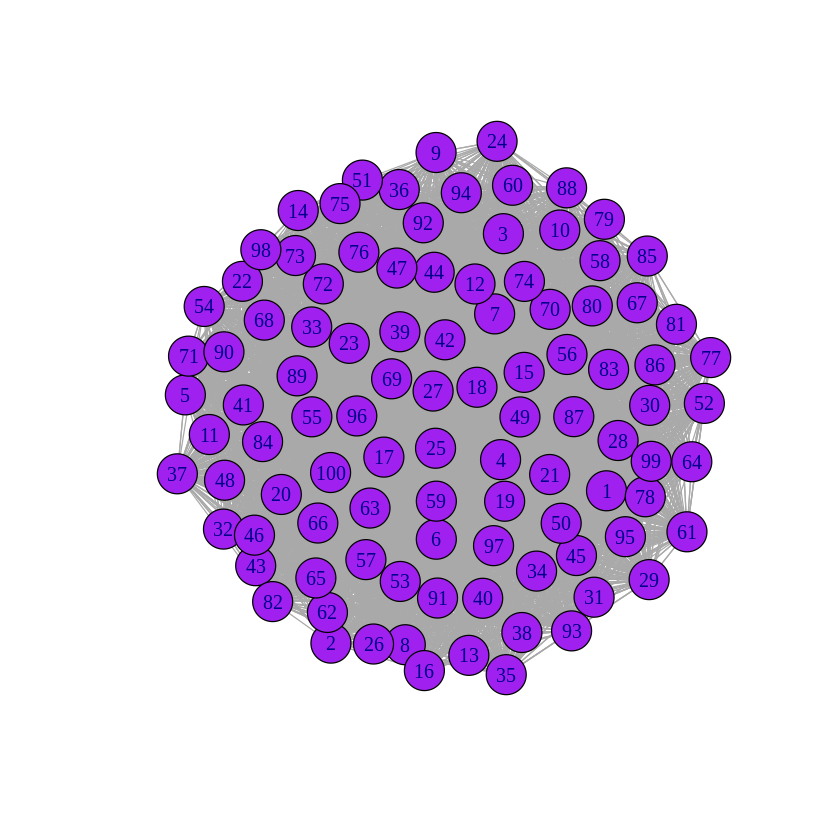

In [37]:
plot(x=dag, edge.arrow.size=0.001,
    vertex.color = 'purple',)

### 3. Вычислить «пятичисловую сводку» для графа $\mathcal{G}_d$.

In [39]:
cat('Size', gorder(dag) , '\n')
cat('Density', edge_density(dag, loops = FALSE) , '\n')
cat('Number of components ', components(dag)$no , '\n')
cat('Diameter ', diameter(dag) , '\n')
cat('Clustering coefficient ', transitivity(dag) , '\n')

Size 100 
Density 0.6847475 
Number of components  1 
Diameter  2 
Clustering coefficient  0.8999809 


### 4. Вычислить цензус диад. Сделать выводы.

In [19]:
census <- dyad.census(dag)
census

$mut
[1] 2321

$asym
[1] 2137

$null
[1] 492

Количество пар с взаимными соединениями 𝑀 равно 2321.

Количество однонаправленных соединений 𝐴 равно 2137.

Количество пар, между которыми нет соединений 𝑁 равно 492.

### 5. Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

In [22]:
X <- as_adjacency_matrix(dag, sparse=FALSE)
M <- 0
for (j in 1:ncol(X)) {
    for (i in 1:nrow(X)) {
        if (i < j){
            M <- M + X[i,j]*X[j,i]
        }
    }
}
M == census$mut
M

[1] TRUE

[1] 2321

In [23]:
L <- 0
for (j in 1:ncol(X)) {
    for (i in 1:nrow(X)) {
        L <- L + X[i,j]
    }
}
L == gsize(dag)

[1] TRUE

[1] 6779

In [24]:
L_2 <- 0
for (j in 1:ncol(X)) {
    for (i in 1:nrow(X)) {
        L_2 <- L_2 + (X[i,j])^2
    }
}
L == L_2
L_2

[1] TRUE

[1] 6779

In [45]:
d <- 42

p.kp <- (2*(gorder(dag)-1) * M - gorder(dag) * d^2)/(gorder(dag) * d * (gorder(dag)-1-d))
cat('Коэффициент Каца-Пауэла при d = 42: ', p.kp , '\n')

p.kp.free <- (2*((gorder(dag)-1)^2) * M - (L^2) + L_2)/ (L*(gorder(dag)-1)^2 - (L^2) + L_2)
cat('Коэффициент Каца-Пауэла при свободном выборе: ', p.kp.free,'\n')

Коэффициент Каца-Пауэла при d = 42:  1.182782 
Коэффициент Каца-Пауэла при свободном выборе:  -0.02204762 


Для свободного выбора, акторы не имеют тенденции взаимно выбирать друг друга.

### 6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [46]:
fixed <- d/(g - 1) * (d/(g - 1) + p.kp * (g - 1 - d)/(g - 1))
free <- d/(g - 1) * (d/(g - 1) + p.kp.free * (g - 1 - d)/(g - 1))
fixed
free

[1] 0.4688889

[1] 0.1745963

### 7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [47]:
reciprocity(dag)

[1] 0.6847618

Значение близко к p

### 8. Проверить нулевую гипотезу о том, что число дуг $L $ в орграфе $\mathcal{G}_d$ имеет биномиальное распределение 𝐿 ∼ Bin(g(g − 1), 1/2) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

#### <center> $H_0 : n = g(g-1)$
#### <center> $H_0 : n \neq g(g-1)$
#### <center> Two-tailed Z-test

In [42]:
n <- g * (g - 1)
p <- 0.5

Z_score <- abs((sum(X) - n*p))/sqrt(n*p*(1-p))
Z_score

[1] 36.76428

### 9. Проверить нулевую гипотезу о том, что число дуг $L $ в орграфе $\mathcal{G}_d$ имеет биномиальное распределение 𝐿 ∼ Bin(g(g − 1), $P_0$) при уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [43]:
Z_score_2 <- (sum(X) - p0 * n)/sqrt(p0 * (1-p0) * n)
Z_score_2

[1] -14.99389

### 10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [51]:
p_cap <- sum(X)/(g*(g-1))
z_alpha_over_two <- 0.48
p_lower <- p_cap - z_alpha_over_two * sqrt(p_cap * (1 - p_cap)/(g*(g-1)))
p_upper <- p_cap + z_alpha_over_two * sqrt(p_cap * (1 - p_cap)/(g*(g-1)))
cat('C вероятностью 96% интервал от ', p_lower, ' до ', p_upper, ' накрывает истинное значение параметра p')

C вероятностью 96% интервал от  0.6825061  до  0.6869889  накрывает истинное значение параметра p

## Выводы
В ходе выполнения данной практической работы был проведен статистический анализ случайно сгенерированного направленного ориентированного графа с использованием средств языка R, визуализирован полученный граф , посчитана его пятичисловая сводка, вычислены цензус диад, оценка индекса взаимности Каца—Пауэла, индекс взаимности Бандиопадхьяйя, проверены гипотезы о биномиальном распределении числе дуг и построен доверительный интервал.